<a href="https://colab.research.google.com/github/KipkiruiCloud/colab-notebook/blob/main/PCA_Housing_Price_ipynbp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Importing Housing.csv
housing = pd.read_csv('/content/newhousing.csv')

In [58]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [59]:
housing.shape

(545, 16)

In [60]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.3 KB


In [61]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [62]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

<ipython-input-63-ddda3f7b3fdc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


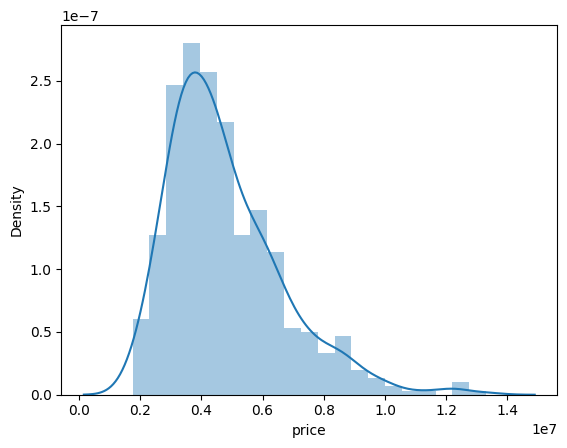

In [63]:
sns.distplot(y)
plt.show()

In [64]:
y.skew()

np.float64(1.2122388370279804)

In [65]:
from scipy import stats
y=stats.boxcox(y)[0]

<ipython-input-66-ddda3f7b3fdc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


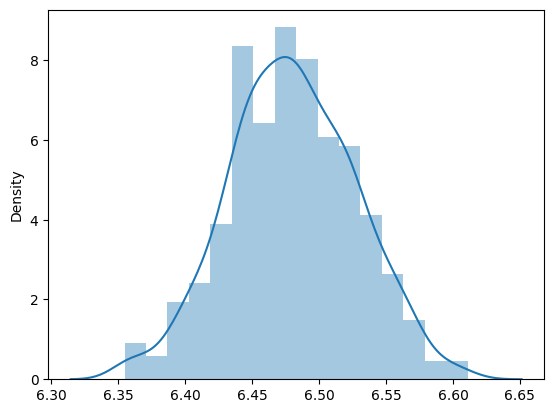

In [66]:
sns.distplot(y)
plt.show()

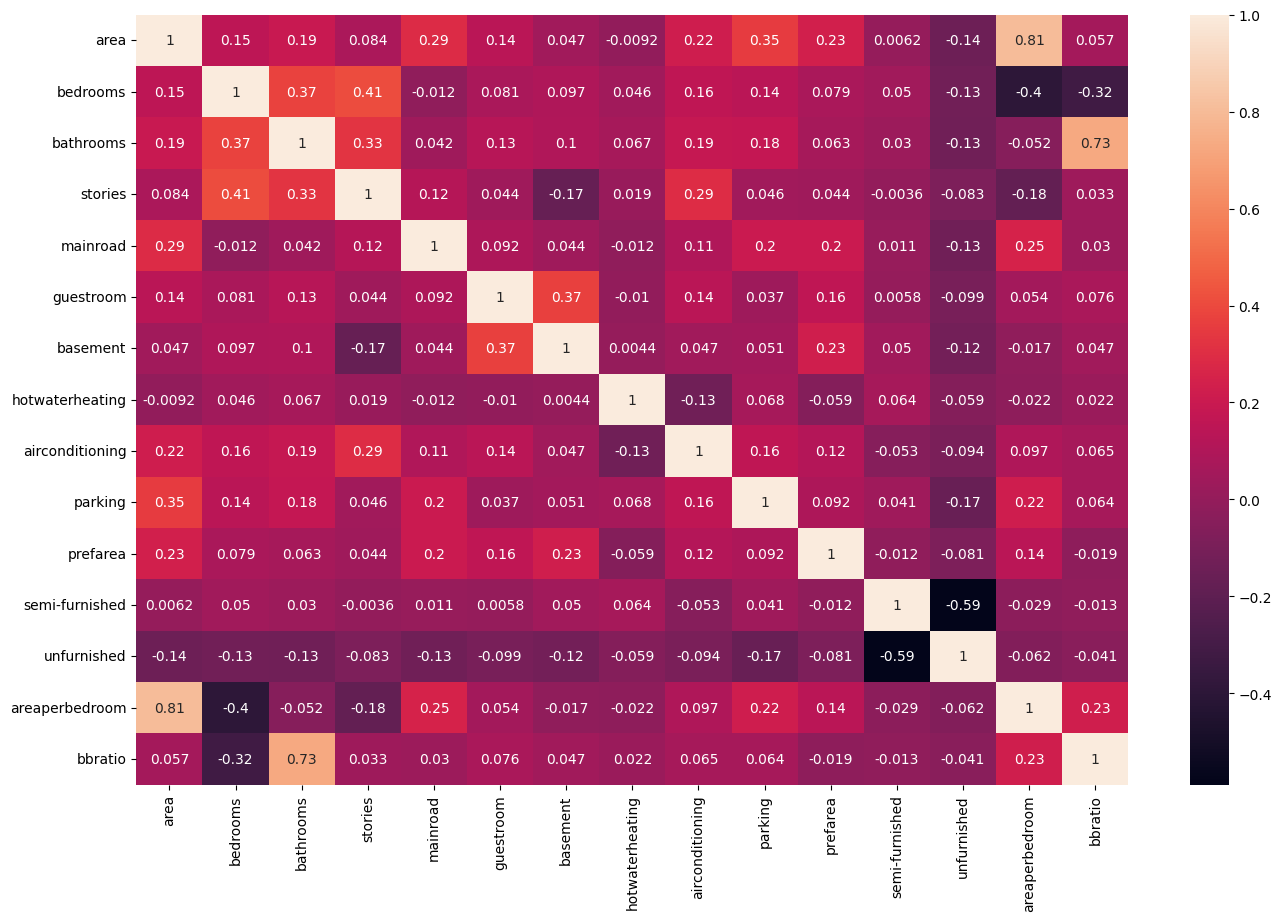

In [67]:
# Importing matplotlib and seaborn
%matplotlib inline
# Let's see the correlation matrix
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

In [68]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

In [69]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [70]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)

max corr: 0.8056104195904636 , min corr:  -0.5884049771343842


In [71]:
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max (np.int64(0), np.int64(13))
Maximum correlation : 0.8056104195904636


In [72]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (np.int64(3), np.int64(11))
Minimum correlation : -0.003648304604063477


In [73]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

from sklearn.preprocessing import PowerTransformer

In [74]:
X_train.shape
# We have 15 variables after splitting the data

(381, 15)

In [ ]:
scaler = PowerTransformer()
Xtrain=scaler.fit_transform(X_train)
Xtest=scaler.transform(X_test)

In [ ]:
Xtrain.shape

(381, 15)

In [ ]:
xtrain_df = pd.DataFrame(Xtrain,columns=X_train.columns)
Xtrain[:,0].max()
xtrain_df['area'].max()

2.873470816532277

In [ ]:
y_train.shape

(381,)

In [ ]:
xtest_df = pd.DataFrame(Xtest,columns=X_train.columns)
xtest_df['guestroom'].min()

-0.4661034178872047

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xtrain, y_train)
# Make predictions using the testing set
y_pred = regr.predict(Xtest)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.00


In [ ]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

In [ ]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=42)

In [ ]:
#Doing the PCA on the train data
pca.fit(Xtrain)

In [ ]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

In [ ]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})

In [ ]:
pcs_df

In [ ]:
pca.explained_variance_

In [ ]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

In [ ]:
print (pca.explained_variance_ratio_.cumsum())

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=.946, xmax=15, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (20,12))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

In [ ]:
pca_train = pca.transform(Xtrain)
pca_train.shape

In [ ]:
pca_train

In [ ]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())
corrmat

In [ ]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [ ]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

In [ ]:
#Applying selected components to the test data - 13 components
pca_test = pca.transform(Xtest)
pca_test.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(pca_train, y_train)
# Make predictions using the principal components of the transformed testing set
y_pca_pred = regrpca.predict(pca_test)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pca_pred))

In [ ]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pca_pred))

In [ ]:
pca = PCA(n_components=10,random_state=42)
#Scale and transform data to get Principal Components

In [ ]:
Xtrain_reduced = pca.fit_transform(Xtrain)
Xtest_reduced = pca.transform(Xtest)
regrpca6 = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca6.fit(Xtrain_reduced, y_train)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca6.predict(Xtest_reduced)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

In [ ]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))